In [7]:
# Para utilizar ferramentas matemáticas
import numpy as np

# Para utilizar simulador e hardware quântico real
from qiskit import IBMQ, Aer
from qiskit.tools.monitor import job_monitor

# Para construir e manipular circuitos
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, transpile

# Para utilizar ferramentas de visualização
from qiskit.visualization import plot_histogram

In [8]:
# ORÁCULO CONSTANTE
# Número de qubits da entrada
n = 3

# Cria o circuito quântico
reg_x = QuantumRegister(n, name='x')
reg_a = QuantumRegister(1, name='a')
const_oracle = QuantumCircuit(reg_x, reg_a)

# A entrada não influencia a saída
output = np.random.randint(2)
if output == 1:
    const_oracle.x(n)
    
# Mostra o circuito do oráculo
const_oracle.draw()

x_0: ─────
          
x_1: ─────
          
x_2: ─────
     ┌───┐
  a: ┤ X ├
     └───┘

In [9]:
# ORÁCULO BALANCEADO
# Número de qubits da entrada
n = 5

# Cria o circuito quântico
reg_x = QuantumRegister(n, name='x')
reg_a = QuantumRegister(1, name='a')
balanced_oracle = QuantumCircuit(reg_x, reg_a)

# Controla quais qubits de entrada passarão por uma porta X (little-endian)
b_str = "010"

# Inclui as portas X
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Inclui uma barra para facilitar a visualização do circuito
# (comentar quando for converter o circuito com to_gate())
#balanced_oracle.barrier()

# Inclui as portas CNOT
for qubit in range(n):
    balanced_oracle.cx(qubit, n)

# Inclui uma barra para facilitar a visualização do circuito
# (comentar quando for converter o circuito com to_gate())
#balanced_oracle.barrier()

# Inclui as portas X
for qubit in range(len(b_str)):
    if b_str[qubit] == '1':
        balanced_oracle.x(qubit)

# Mostra o circuito do oráculo
balanced_oracle.draw()

x_0: ───────■──────────────────────
     ┌───┐  │       ┌───┐          
x_1: ┤ X ├──┼────■──┤ X ├──────────
     └───┘  │    │  └───┘          
x_2: ───────┼────┼────■────────────
            │    │    │            
x_3: ───────┼────┼────┼────■───────
            │    │    │    │       
x_4: ───────┼────┼────┼────┼────■──
          ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐
  a: ─────┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├
          └───┘└───┘└───┘└───┘└───┘

In [10]:
# ALGORITMO DEUTSCH-JOZSA (DJ)
# Encapsula os oráculos em portas quânticas
const_oracle_gate = const_oracle.to_gate()
const_oracle_gate.name = "Oracle"
balanced_oracle_gate = balanced_oracle.to_gate()
balanced_oracle_gate.name = "Oracle"

# Cria o circuito quântico
reg_x = QuantumRegister(n, name='x')
reg_a = QuantumRegister(1, name='a')
creg = ClassicalRegister(n, name='c')
dj_circuit = QuantumCircuit(reg_x, reg_a, creg)

# Inclui as portas Hadamard
for qubit in range(n):
    dj_circuit.h(qubit)
    
# Coloca o qubit ancilla no estado |->
dj_circuit.x(n)
dj_circuit.h(n)

# Inclui uma barra para facilitar a visualização do circuito
dj_circuit.barrier()

# Adiciona o oráculo desejado
#dj_circuit += const_oracle 
#dj_circuit += balanced_oracle

# Adiciona o oráculo desejado de forma encapsulada
#dj_circuit.append(const_oracle_gate, range(n+1))
dj_circuit.append(balanced_oracle_gate, range(n+1))

# Inclui uma barra para facilitar a visualização do circuito
dj_circuit.barrier()

# Repete a inclusão das portas Hadamard
for qubit in range(n):
    dj_circuit.h(qubit)
    
# Inclui uma barra para facilitar a visualização do circuito
dj_circuit.barrier()

# Inclui as medições
for i in range(n):
    dj_circuit.measure(i, i)
    
# Mostra o circuito do algoritmo DJ
dj_circuit.draw()

┌───┐      ░ ┌─────────┐ ░ ┌───┐ ░ ┌─┐            
x_0: ┤ H ├──────░─┤0        ├─░─┤ H ├─░─┤M├────────────
     ├───┤      ░ │         │ ░ ├───┤ ░ └╥┘┌─┐         
x_1: ┤ H ├──────░─┤1        ├─░─┤ H ├─░──╫─┤M├─────────
     ├───┤      ░ │         │ ░ ├───┤ ░  ║ └╥┘┌─┐      
x_2: ┤ H ├──────░─┤2        ├─░─┤ H ├─░──╫──╫─┤M├──────
     ├───┤      ░ │  Oracle │ ░ ├───┤ ░  ║  ║ └╥┘┌─┐   
x_3: ┤ H ├──────░─┤3        ├─░─┤ H ├─░──╫──╫──╫─┤M├───
     ├───┤      ░ │         │ ░ ├───┤ ░  ║  ║  ║ └╥┘┌─┐
x_4: ┤ H ├──────░─┤4        ├─░─┤ H ├─░──╫──╫──╫──╫─┤M├
     ├───┤┌───┐ ░ │         │ ░ └───┘ ░  ║  ║  ║  ║ └╥┘
  a: ┤ X ├┤ H ├─░─┤5        ├─░───────░──╫──╫──╫──╫──╫─
     └───┘└───┘ ░ └─────────┘ ░       ░  ║  ║  ║  ║  ║ 
c: 5/════════════════════════════════════╩══╩══╩══╩══╩═
                                         0  1  2  3  4

/var/folders/30/pgp77_r92w5_rn1ghx4kn51h0000gn/T/ipykernel_29900/3254517452.py:7: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = aer_sim.run(qobj).result()


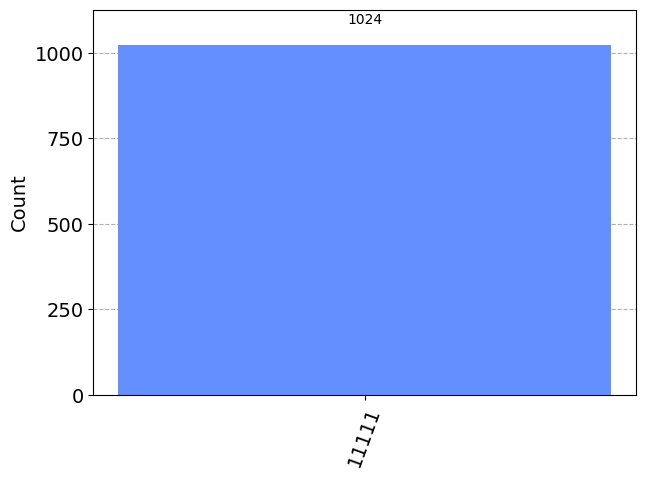

In [11]:
# Excecuta em um simulador
aer_sim = Aer.get_backend('aer_simulator')
t_dj_circuit = transpile(dj_circuit, aer_sim)
qobj = assemble(t_dj_circuit, aer_sim)

# Obtém os resultados
results = aer_sim.run(qobj).result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

In [12]:
# Excecuta em um hardware quântico
# Carrega uma conta do IBMQ e obtém o dispositivo menos ocupado que tenha um número de qubits maior ou igual a (n+1)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = (provider.backends(filters=lambda x: x.configuration().n_qubits >= (n+1) and
                                   not x.configuration().simulator and x.status().operational==True))

# Transpila e executa
t_dj_circuit = transpile(dj_circuit, backend)
job = backend.run(t_dj_circuit)

# Obtém os resultados
results = job.result()
answer = results.get_counts()

# Mostra os resultados
plot_histogram(answer)

IBMQAccountCredentialsNotFound: 'No IBM Quantum Experience credentials found.'